In [1]:
# TODO: Algorithm description

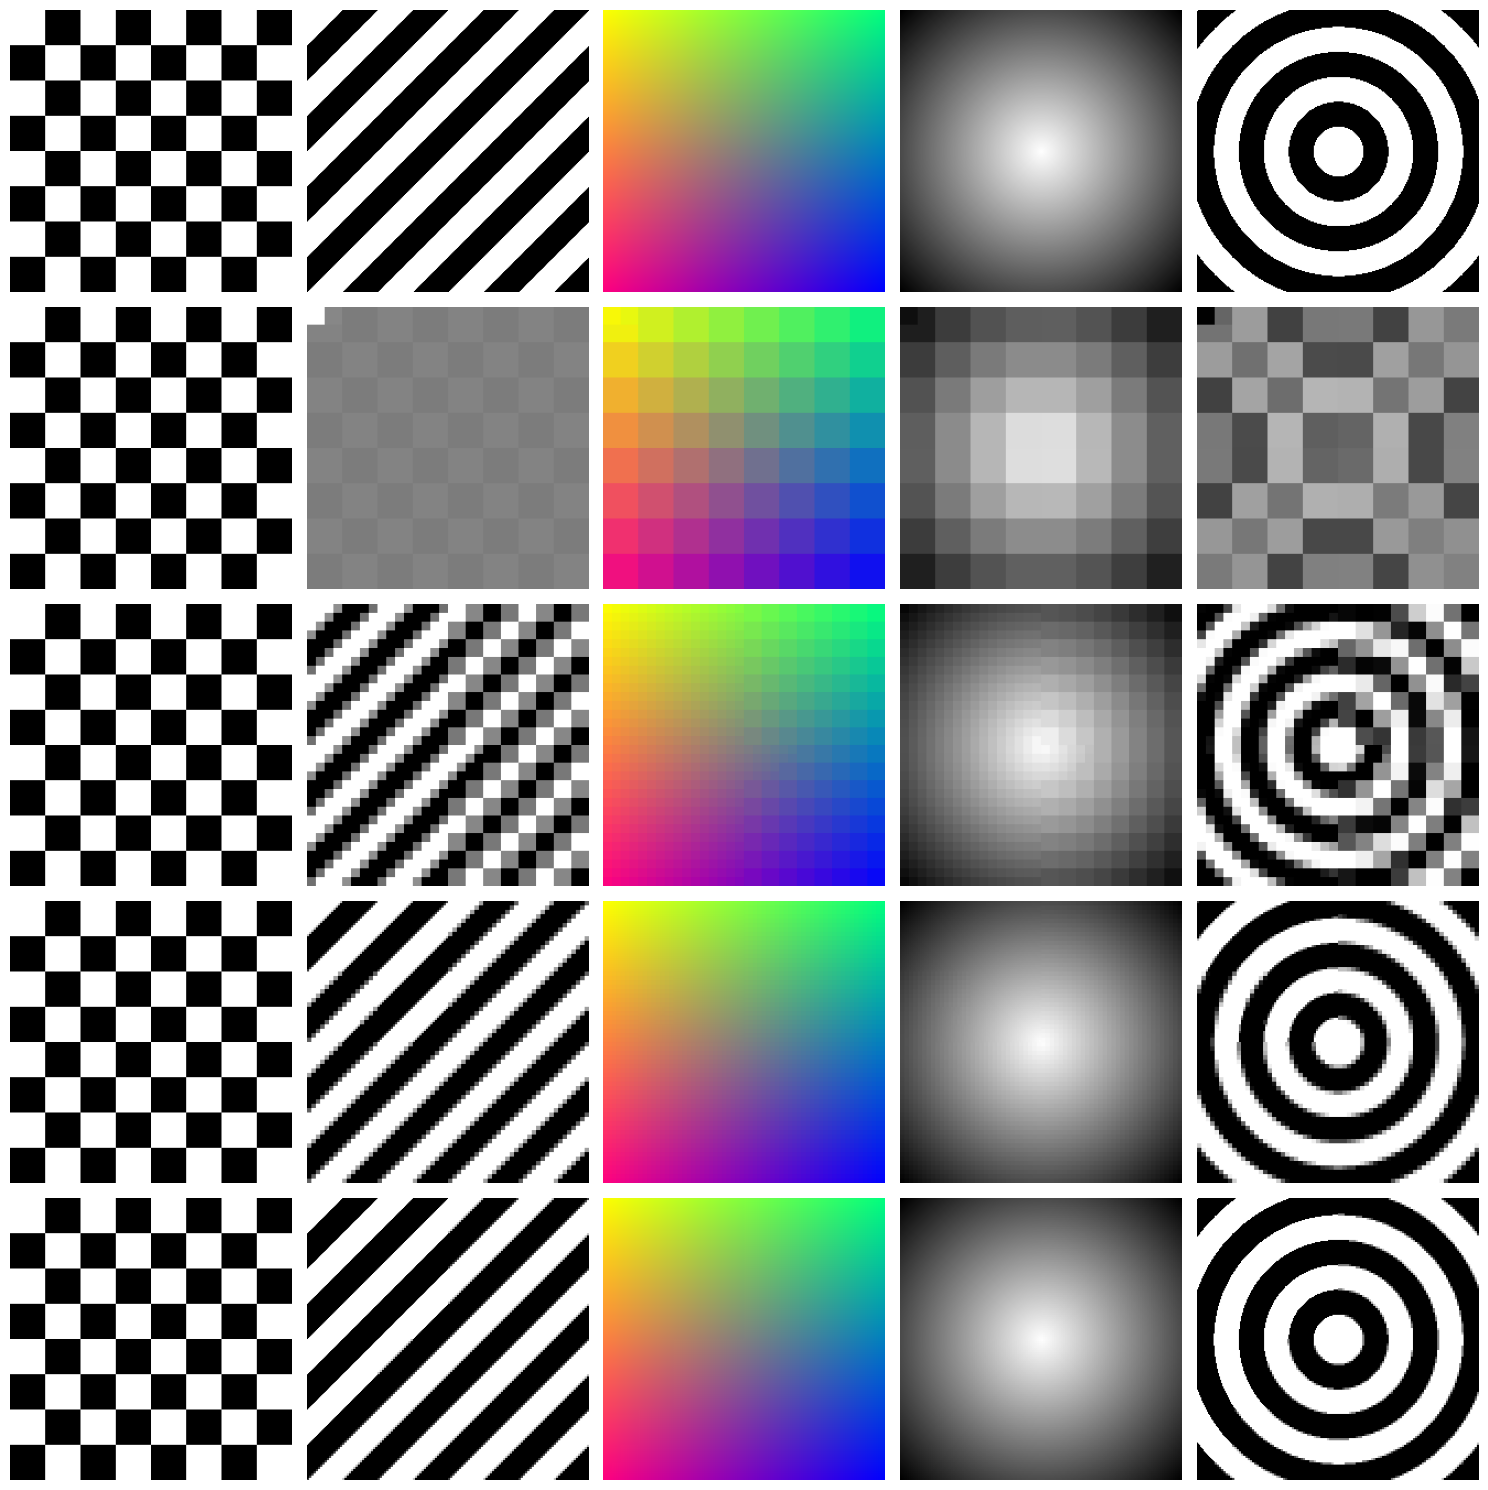

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import generated_images

from processor import FractalImageProcessor
import curves

processor = FractalImageProcessor(curves.HilbertCurve())
prefix_lengths = [0.001, 0.01, 0.1, 0.5]
images = [
    generated_images.checkerboard(256), 
    generated_images.diagonal_stripes(256), 
    generated_images.color_gradient(256), 
    generated_images.radial_gradient(256),
    generated_images.concentric_circles(256)]

_, ax = plt.subplots(len(prefix_lengths)+1, len(images), figsize=(15, 15))
for i, image in enumerate(images):
    ax[0, i].imshow(image)
    ax[0, i].axis('off')

    encoded, metadata = processor.encode(image)

    for j, prefix_length in enumerate(prefix_lengths):
        decoded = processor.decode(encoded, metadata, prefix_length)
        ax[j + 1, i].imshow(decoded)
        ax[j + 1, i].axis('off')

plt.tight_layout()
plt.show()

/home/meeeso/Documents/Code/fractal-prefix-image-format/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded 5/3680 images


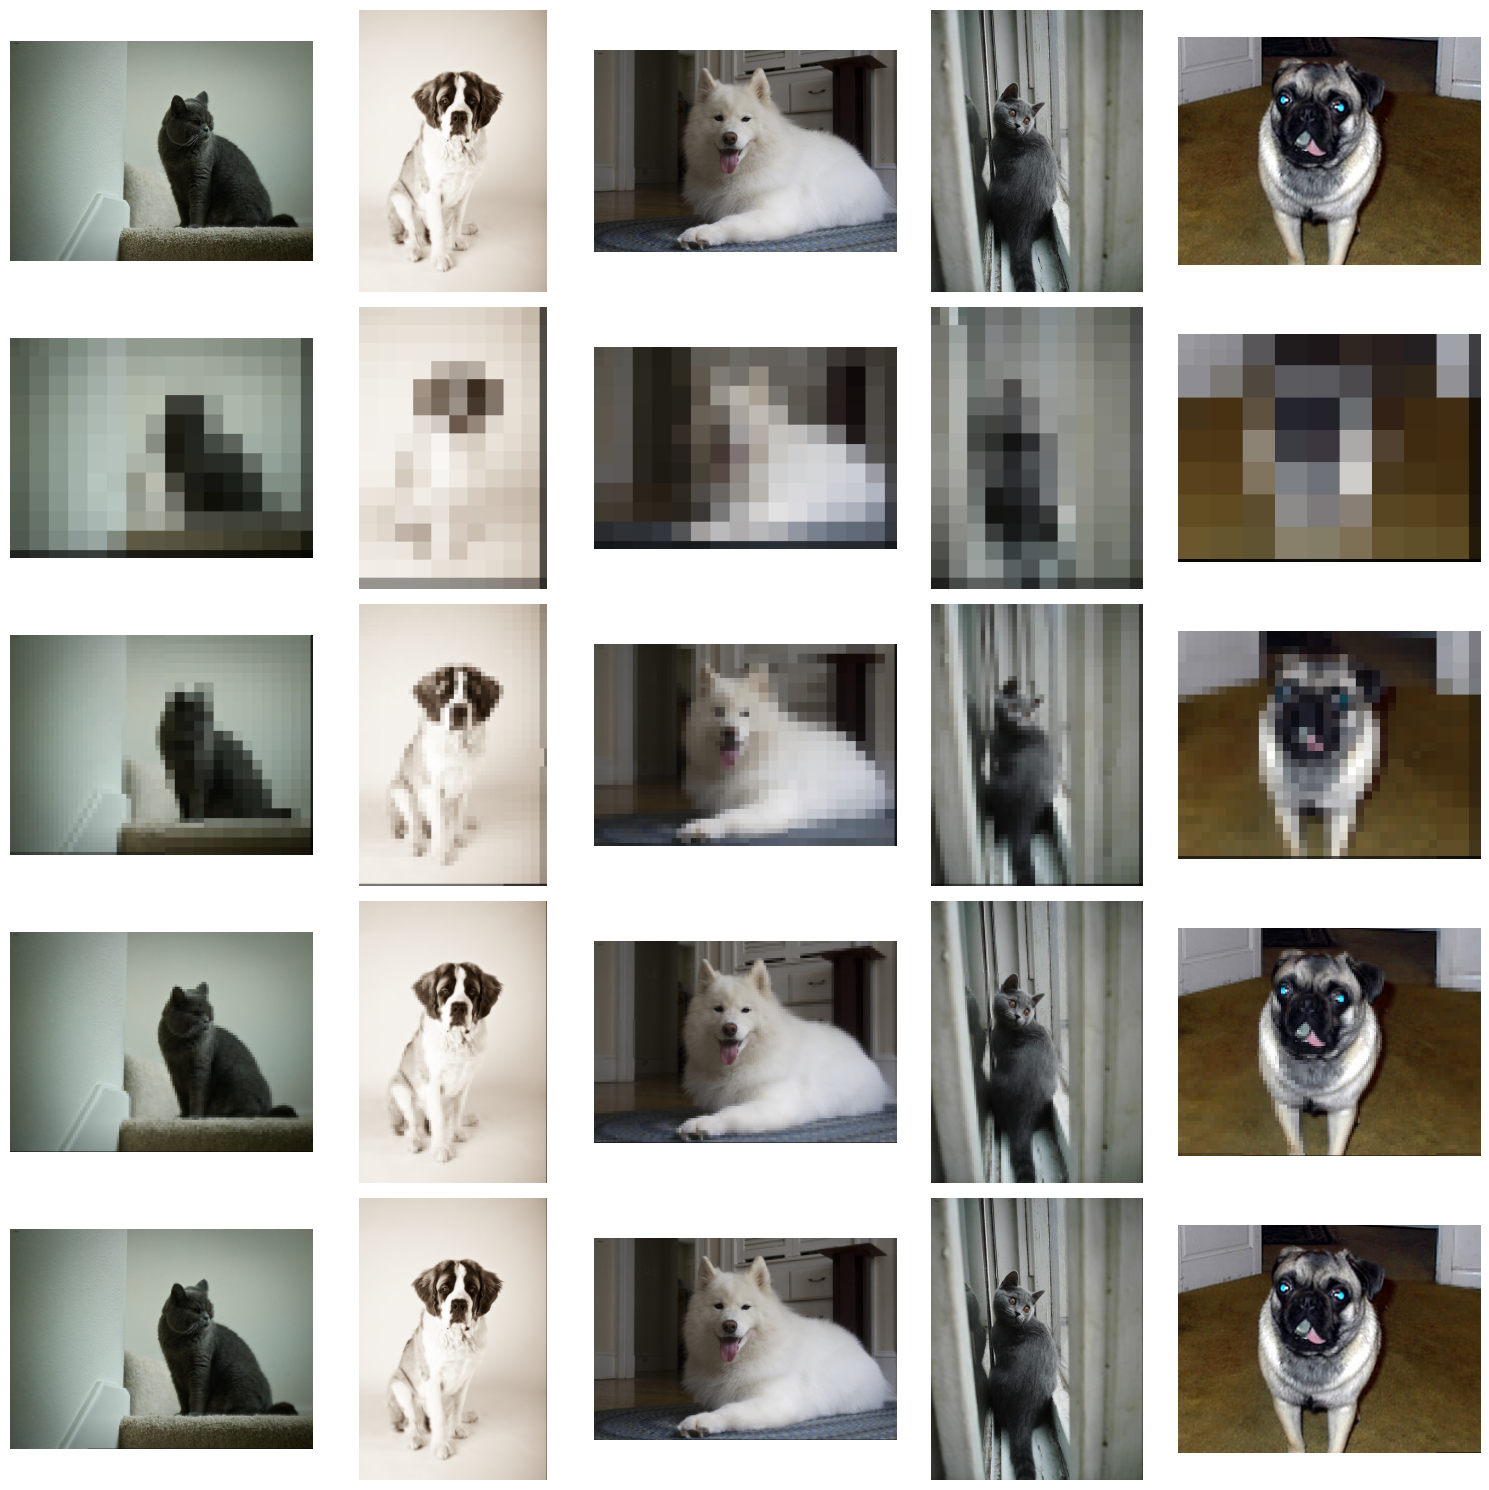

In [3]:
import dataset_loader

prefix_lengths = [0.001, 0.01, 0.1, 0.5]
example_images = dataset_loader.load_images(5, random_seed=123)

_, ax = plt.subplots(len(prefix_lengths)+1, len(example_images), figsize=(15, 15))
for i, image in enumerate(example_images):
    ax[0, i].imshow(image)
    ax[0, i].axis('off')

    encoded, metadata = processor.encode(image)

    for j, prefix_length in enumerate(prefix_lengths):
        decoded = processor.decode(encoded, metadata, prefix_length)
        ax[j + 1, i].imshow(decoded)
        ax[j + 1, i].axis('off')

plt.tight_layout()
plt.show()

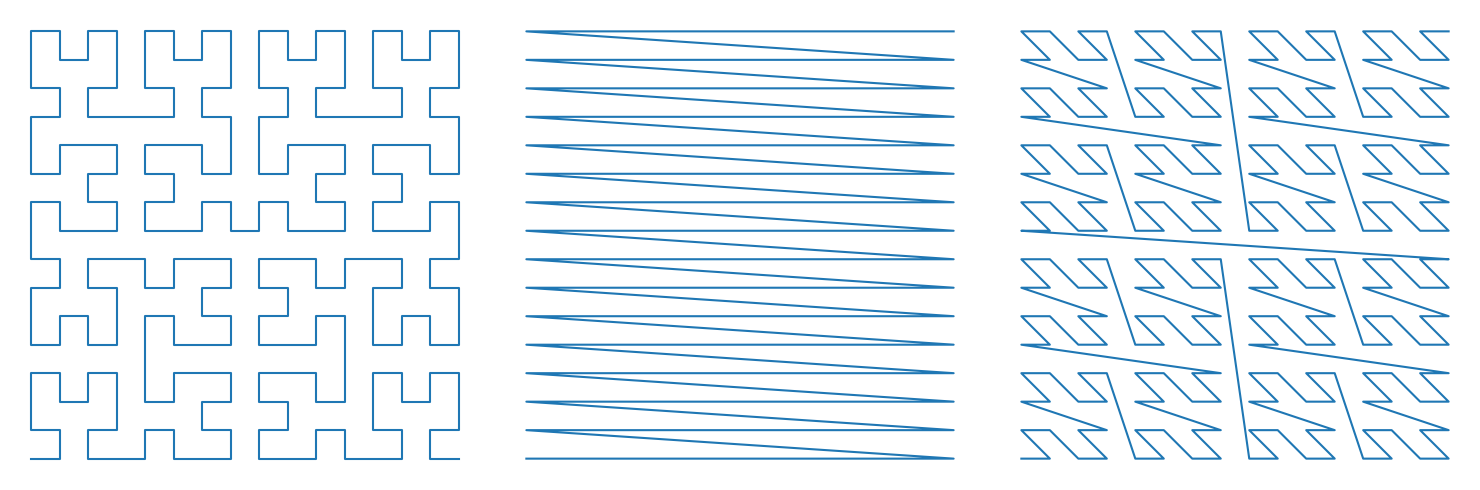

In [4]:
import curves

implemented_curves = [curves.HilbertCurve(), curves.ScanlineCurve(), curves.ZOrderCurve()]

_, ax = plt.subplots(1, len(implemented_curves), figsize=(15, 5))
for i, curve in enumerate(implemented_curves):
    order = 4
    t = list(range(4 ** order))
    x = [curve.d_to_xy(value, order)[0] for value in t]
    y = [curve.d_to_xy(value, order)[1] for value in t]
    ax[i].plot(x, y)
    ax[i].set_aspect('equal')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

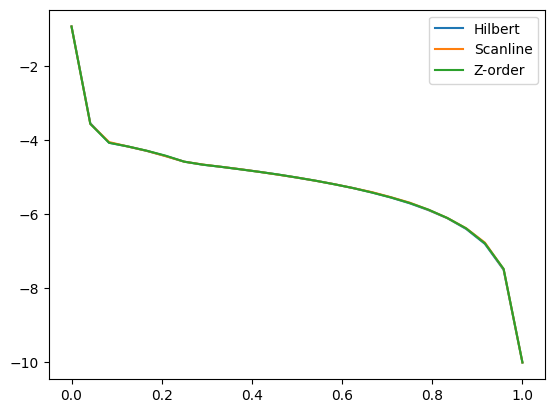

In [5]:
# TODO: Comparison of different curves  on generated images
# Averaged error curves on single plot
# Area under the error curve
import analysis

images = [
    generated_images.checkerboard(128), 

    generated_images.diagonal_stripes(128), 
    generated_images.horizontal_stripes(128), 
    generated_images.vertical_stripes(128), 

    generated_images.diagonal_gradient(128),
    generated_images.horizontal_gradient(128),
    generated_images.vertical_gradient(128),
    generated_images.color_gradient(128), 

    generated_images.radial_gradient(128),
    generated_images.concentric_circles(128),
    generated_images.random_noise(128)]

curves_to_test = {
    'Hilbert': curves.HilbertCurve(), 
    'Scanline': curves.ScanlineCurve(), 
    'Z-order': curves.ZOrderCurve()
}

prefix_lengths = np.linspace(1e-6, 1-1e-6, 25)

results = {}
for curve_name, curve in curves_to_test.items():
    processor = FractalImageProcessor(curve)
    results[curve_name] = analysis.calculate_error_curve(processor, images, prefix_lengths)

for curve_name, result in results.items():
    plt.plot(prefix_lengths, np.log([max(v, np.exp(-10)) for v in result]), label=curve_name)

plt.legend()
plt.show()

Loaded 25/3680 images


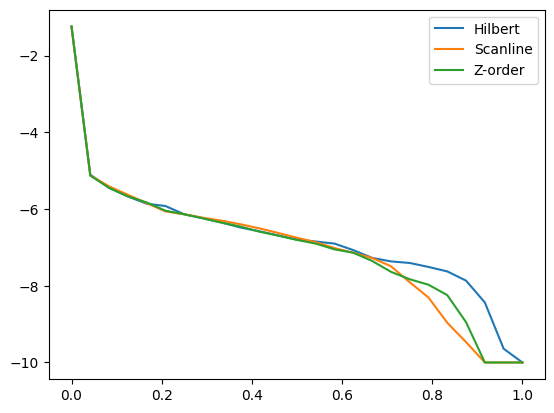

In [6]:
images = dataset_loader.load_images(25, random_seed=123)

curves_to_test = {
    'Hilbert': curves.HilbertCurve(), 
    'Scanline': curves.ScanlineCurve(), 
    'Z-order': curves.ZOrderCurve()
}

prefix_lengths = np.linspace(1e-6, 1-1e-6, 25)

results = {}
for curve_name, curve in curves_to_test.items():
    processor = FractalImageProcessor(curve)
    results[curve_name] = analysis.calculate_error_curve(processor, images, prefix_lengths)

for curve_name, result in results.items():
    plt.plot(prefix_lengths, np.log([max(v, np.exp(-10)) for v in result]), label=curve_name)

plt.legend()
plt.show()

In [12]:
areas = {name: analysis.area_under_curve(result, prefix_lengths) for name, result in results.items()}
for name, area in areas.items():
    print(f"{(f"{name}:"):<12} {area:0.4e}")

Hilbert:     7.5741e-03
Scanline:    7.5208e-03
Z-order:     7.4936e-03
